# Raspagem de Dados com Python e BeautifulSoup

https://medium.com/machina-sapiens/raspagem-de-dados-com-python-e-beautifulsoup-1b1b7019774c

In [85]:
from requests import get
from bs4 import BeautifulSoup

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'

In [4]:
response = get(url)
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [5]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [6]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


### Extraindo dados de um único filme

In [7]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/?ref_=adv_li_i"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted ">
<span class="certificate">16</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|<

#### O nome do filme


In [16]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [9]:
first_movie.a

<a href="/title/tt3315342/?ref_=adv_li_i"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a>

In [11]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [24]:
print(first_movie.h3.a)
print(first_movie.h3.a.text)

<a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>
Logan


#### O ano de lançamento do filme

In [15]:
first_name = first_movie.h3.a.text

print(first_name)

Logan


In [23]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
print(first_year.text)
print(str(first_year.text).strip('()')) # Limpeza

(2017)
2017


#### A avaliação IMDB


In [31]:
first_imdb = float(first_movie.strong.text)

print(first_movie.strong)
first_imdb

<strong>8.1</strong>


8.1

#### O Metascore


In [51]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = float(first_mscore.text)
first_mscore

77.0

#### O número de votos


In [61]:
first_votes = first_movie.find('span', attrs ={'name':'nv'})
first_votes = int(first_votes['data-value'])
first_votes

505397

#### O script para uma página

In [62]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
    
    # If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
        
        # The name
        name = container.h3.a.text
        names.append(name)
        
        # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
        
        # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        
        # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
        
        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

#### Pandas

In [71]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'metascore': metascores,
                       'votes': votes})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
movie        47 non-null object
year         47 non-null object
imdb         47 non-null float64
metascore    47 non-null int64
votes        47 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,505397
1,Mulher-Maravilha,(2017),7.5,76,433738
2,Dunkirk,(2017),8.0,94,415246
3,Star Wars: Os Últimos Jedi,(2017),7.2,85,411253
4,Guardiões da Galáxia Vol. 2,(2017),7.7,67,406751
5,Thor: Ragnarok,(2017),7.9,74,380778
6,Homem-Aranha: De Volta ao Lar,(2017),7.5,73,353693
7,Corra!,(I) (2017),7.7,84,328654
8,Blade Runner 2049,(2017),8.1,81,326730
9,Em Ritmo de Fuga,(2017),7.7,86,321497


### Juntando tudo

In [79]:
from time import time
from time import sleep
from random import randint

from IPython.core.display import clear_output
from warnings import warn



# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Preparing the monitoring of the loop
start_time = time()
requests = 0

pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

headers = {"Accept-Language": "en-US, en;q=0.5"}


# For every year in the interval 2000-2018
for year_url in years_url:
    
    # For every page in the interval 1-4
    for page in pages:
        
        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url + 
                       '&sort=num_votes,desc&page=' + page, headers = headers)
        # Pause the loop
        sleep(randint(8,15))
        
        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)
        
        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
            
        # Break the loop if the number od requests is greater than exepected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break
        
        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')
        
        # Select all the 50 movie containers from a single page 
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
        
        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:
                
                # Scrape the name
                name = container.h3.a.text
                names.append(name)
                
                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)
                
                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)
                
                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))
                
                # Scrape the number of votes
                vote = container.find('span', attrs = {'name': 'nv'})['data-value']
                votes.append(int(vote))

Request: 72; Frequency: 0.07349169184280252 requests/s


### Examinando os dados extraídos

In [82]:
movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes})

print(movie_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 5 columns):
movie        2947 non-null object
year         2947 non-null object
imdb         2947 non-null float64
metascore    2947 non-null int64
votes        2947 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 115.2+ KB
None


In [83]:
movie_ratings.head(10)

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1150864
1,Memento,(2000),8.5,80,988101
2,Snatch,(2000),8.3,55,691194
3,Requiem for a Dream,(2000),8.3,68,670832
4,X-Men,(2000),7.4,64,515194
5,Cast Away,(2000),7.8,73,453270
6,American Psycho,(2000),7.6,64,412160
7,Unbreakable,(2000),7.3,62,302832
8,Meet the Parents,(2000),7.0,73,285585
9,Mission: Impossible II,(2000),6.1,59,278110


In [90]:
movie =  movie_ratings.describe(include=[np.number])
movie

,imdb,metascore,votes
count,2947.000000,2947.000000,2.947000e+03
mean,6.595860,55.910417,1.316236e+05
std,0.963571,17.942111,1.599001e+05
min,1.600000,7.000000,9.808000e+03
25%,6.100000,43.000000,4.055800e+04
50%,6.700000,56.000000,7.469400e+04
75%,7.300000,69.000000,1.578650e+05
max,9.000000,100.000000,1.960822e+06


### Limpando os dados extraídos


In [92]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head(10)

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1150864
1,Memento,(2000),8.5,80,988101
2,Snatch,(2000),8.3,55,691194
3,Requiem for a Dream,(2000),8.3,68,670832
4,X-Men,(2000),7.4,64,515194
5,Cast Away,(2000),7.8,73,453270
6,American Psycho,(2000),7.6,64,412160
7,Unbreakable,(2000),7.3,62,302832
8,Meet the Parents,(2000),7.0,73,285585
9,Mission: Impossible II,(2000),6.1,59,278110


In [93]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(I) (2001)', '(2002)',
       '(I) (2002)', '(2003)', '(I) (2003)', '(2004)', '(I) (2004)',
       '(2005)', '(I) (2005)', '(2006)', '(I) (2006)', '(2007)',
       '(I) (2007)', '(2008)', '(I) (2008)', '(2009)', '(I) (2009)',
       '(II) (2009)', '(2010)', '(I) (2010)', '(II) (2010)', '(2011)',
       '(I) (2011)', '(IV) (2011)', '(2012)', '(I) (2012)', '(II) (2012)',
       '(2013)', '(I) (2013)', '(II) (2013)', '(2014)', '(I) (2014)',
       '(II) (2014)', '(III) (2014)', '(2015)', '(I) (2015)',
       '(II) (2015)', '(VI) (2015)', '(III) (2015)', '(2016)',
       '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(V) (2016)', '(2017)',
       '(I) (2017)', '(III) (2017)', '(II) (2017)'], dtype=object)

In [94]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [95]:
movie_ratings['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [160]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,1.6,7.0
max,9.0,100.0


In [155]:
movie_ratings['n_imdb'] = movie_ratings['imdb'].astype(int) * 10
movie_ratings.head(10)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1150864,80
1,Memento,2000,8.5,80,988101,80
2,Snatch,2000,8.3,55,691194,80
3,Requiem for a Dream,2000,8.3,68,670832,80
4,X-Men,2000,7.4,64,515194,70
5,Cast Away,2000,7.8,73,453270,70
6,American Psycho,2000,7.6,64,412160,70
7,Unbreakable,2000,7.3,62,302832,70
8,Meet the Parents,2000,7.0,73,285585,70
9,Mission: Impossible II,2000,6.1,59,278110,60


In [161]:
movie_ratings.to_csv('movie_ratings.csv')

## Plotando e analizando as distribuições

In [156]:
import matplotlib.pyplot as plt
# %matplotlib inline

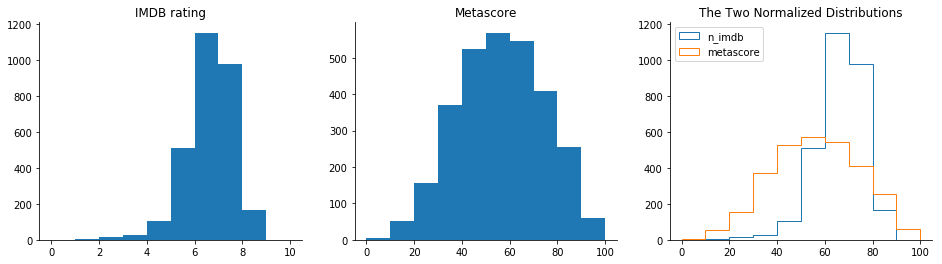

In [157]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins=10, range=(0,10))
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100))
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()


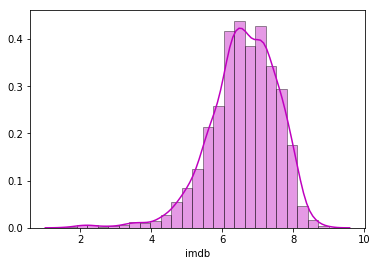

In [159]:
x = movie_ratings['imdb']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

/home/carlos/workspace/park/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


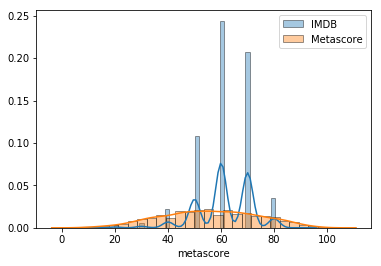

In [154]:
imdb_fuko = movie_ratings['n_imdb']
mscore_fuko = movie_ratings['metascore']

sns.distplot(imdb_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='IMDB')
sns.distplot(mscore_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Metascore')
plt.legend()